In [1]:
import pydot
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [298]:
%store -r train
%store -r test
train
train.head(2)
col=train.columns

In [18]:
# Previous step can be done mucha faster with LabelEncoder from sklearn 
# Import LabelEncoder
from sklearn import preprocessing

# Converting string labels into numbers.The labels are int64
for i in range(len(col)):
    train[col[i]]=le.fit_transform(train[col[i]])
    print('\n')
    print(col[i])
    print(train[col[i]].unique())
train.head()

train_num=train.copy()



work_orer
[ 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65 152 15

In [299]:
# Previous step can be done mucha faster with LabelEncoder from sklearn 
# Import LabelEncoder
from sklearn import preprocessing

# Converting string labels into numbers.The labels are int64
for i in range(len(col)):
    test[col[i]]=le.fit_transform(test[col[i]])
    print('\n')
    print(col[i])
    print(test[col[i]].unique())
test.head()

test_num=test.copy()



work_orer
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58]


priority
[2 0 1]


start_date
[0]


error_code
[2 3 0 1]


order_type
[1 0]


project
[2 1 0]


resource_id2
[2 1 4 5 3 0]


work_type
[0 1 2]


loc1
[2 4 1 0 3]


In [28]:
#train_num=train_num.drop(['work_orer'], axis=1)
print(train_num.head())
resource_id2=train_num.resource_id2.unique()

   priority  start_date  error_code  order_type  project  resource_id2  \
0         0           3           3           0        2             5   
1         0           3           0           1        1             3   
2         0           3           1           1        1             3   
3         0           3           0           1        1             3   
4         2           3           2           1        2             2   

   work_type  loc1  
0          2     2  
1          3     4  
2          3     4  
3          3     4  
4          1     2  


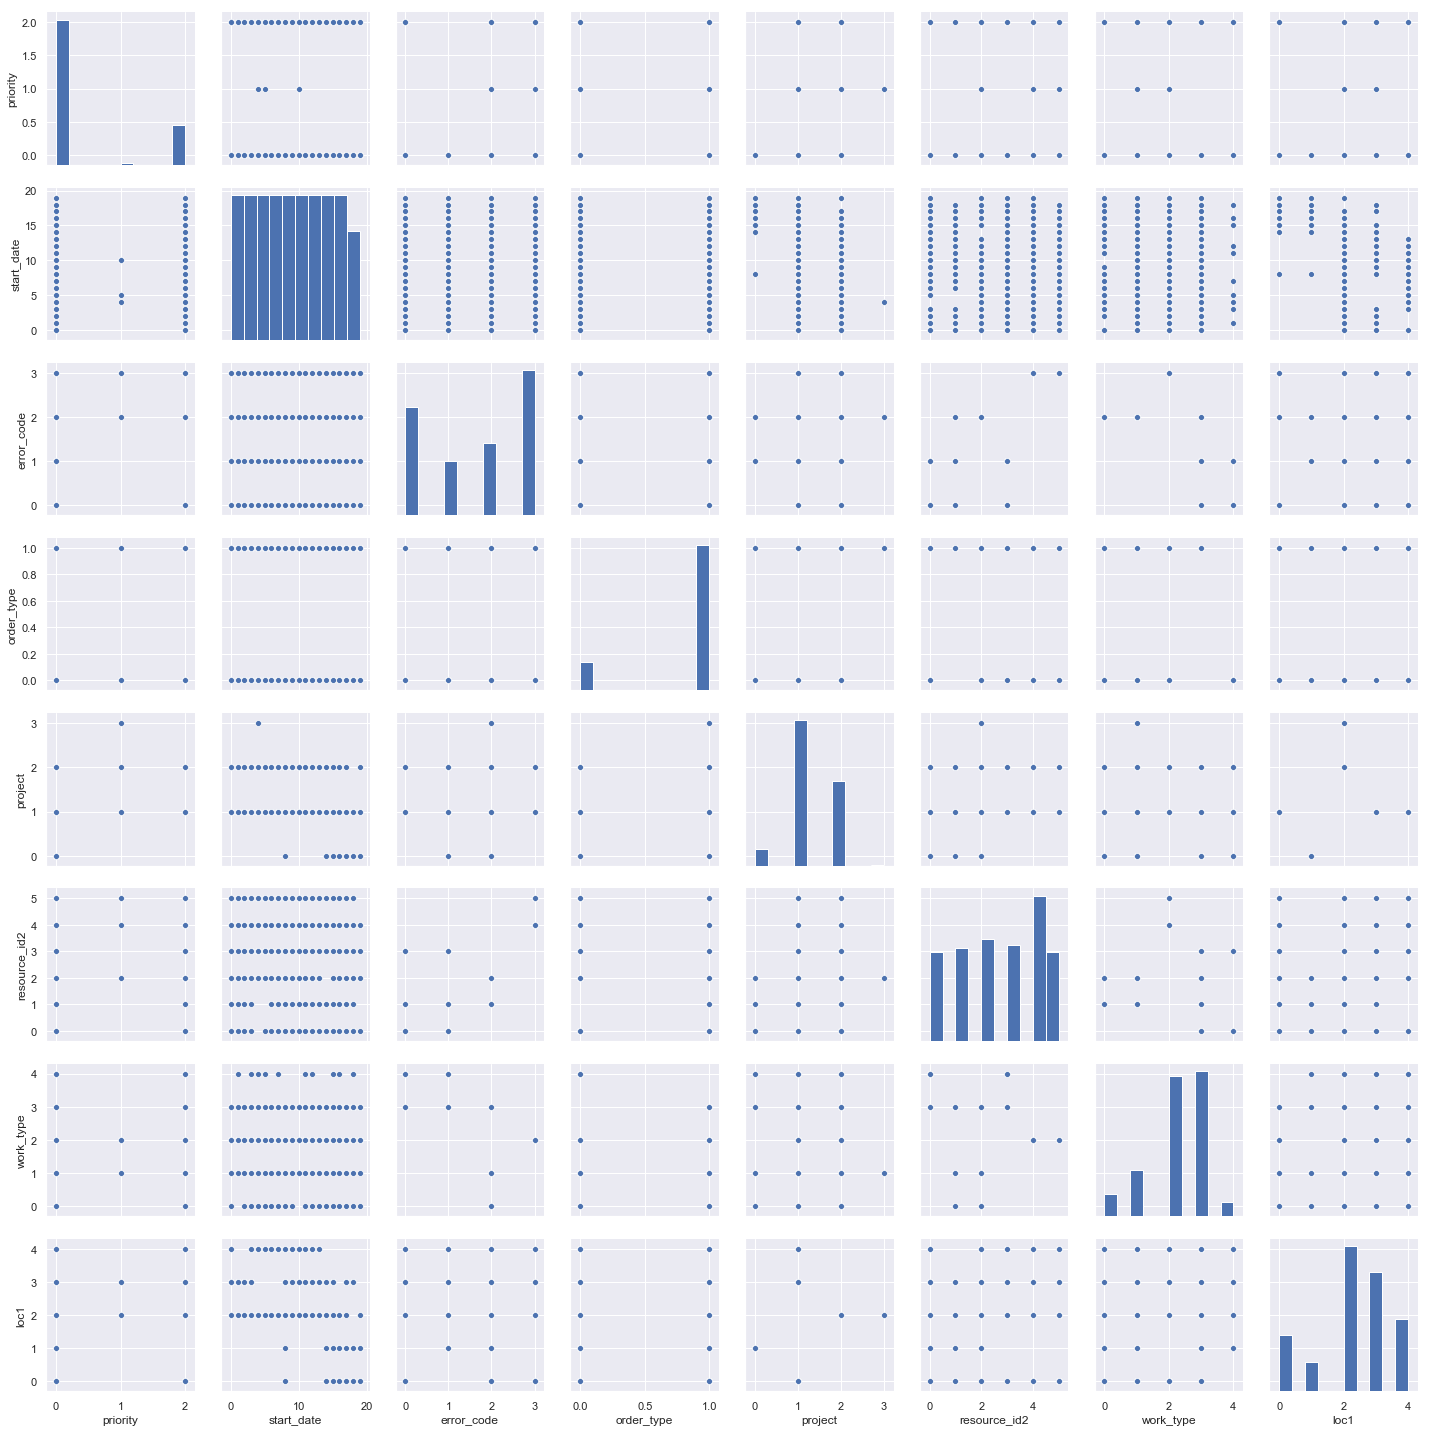

In [31]:
g = sns.pairplot(train_num, palette="hls")

In [20]:
sns_plot.savefig("output.png")

### Hierarchical Clustering 
**variables: `error_code`,`project`, `loc1`**
Against resource_id2

In [289]:
X_train_1_num=train_num.drop(['work_type','priority', 'start_date', 'order_type','resource_id2'], axis=1)
varieties=train['resource_id2'].values
X_train_1_num.columns

Index(['error_code', 'project', 'loc1'], dtype='object')

In [303]:
X_test_1_num=test_num.drop(['work_type','priority', 'start_date', 'order_type','resource_id2'], axis=1)
y_test_num=test['resource_id2'].values
X_test_1_num.columns

Index(['work_orer', 'error_code', 'project', 'loc1'], dtype='object')

In [290]:
samples=X_train_1_num

In [291]:
samples.shape


(351, 3)

In [292]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

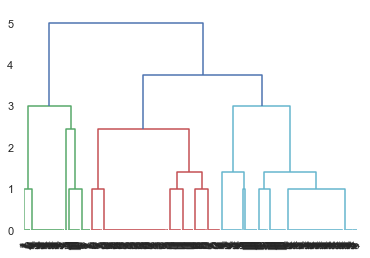

In [293]:
# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
dendogram_3=dendrogram(mergings,
           labels=varieties,
           leaf_rotation=60,
           leaf_font_size=12
          )
plt.show()

In [294]:
plt.savefig('dendogram_3.png')

<Figure size 432x288 with 0 Axes>

In [301]:
X_test_2_num=test_num.drop(['start_date', 'order_type','resource_id2'], axis=1)

Index(['priority', 'error_code', 'project', 'work_type', 'loc1'], dtype='object')


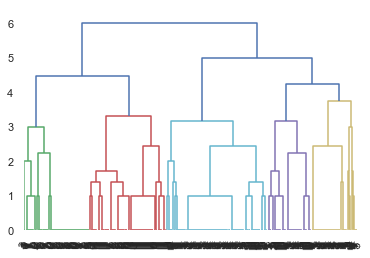

In [295]:
X_train_2_num=train_num.drop(['start_date', 'order_type','resource_id2'], axis=1)
varieties=train['resource_id2'].values
print(X_train_2_num.columns)
samples=X_train_2_num
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
dendogram_5=dendrogram=dendrogram(mergings,
           labels=varieties,
           leaf_rotation=60,
           leaf_font_size=12)
plt.show()

In [276]:
labels=fcluster(mergings,4,criterion='distance')
print(labels)

[4 2 2 2 5 4 4 2 2 5 2 4 4 4 2 4 5 2 5 2 4 2 2 4 5 4 2 2 4 4 2 5 5 2 4 2 4
 2 4 2 4 5 4 1 2 4 2 5 2 4 1 4 4 1 1 4 2 1 4 4 3 5 1 2 3 1 1 4 3 1 3 2 3 2
 3 2 5 3 3 4 2 3 1 3 2 4 3 1 2 3 2 3 1 3 3 1 3 3 3 1 3 2 1 3 3 3 1 2 2 3 2
 3 3 3 3 1 3 1 2 1 3 3 3 1 2 3 2 3 3 3 1 3 3 2 3 1 3 2 1 3 3 3 2 2 3 3 1 3
 3 1 3 1 3 2 3 1 3 3 3 3 2 3 2 3 2 3 1 3 3 1 1 3 2 1 3 3 3 3 2 2 3 2 2 3 3
 1 3 2 3 1 3 2 3 3 3 3 2 3 2 3 1 3 1 3 3 1 3 3 2 1 3 3 3 2 2 3 2 3 1 3 3 1
 3 3 3 1 3 2 1 3 3 3 2 2 2 3 1 3 3 3 3 1 1 3 4 1 3 3 1 1 4 3 3 4 2 1 3 2 1
 4 5 1 5 1 5 1 5 1 4 5 5 4 2 5 2 5 2 5 2 5 4 2 5 5 1 1 4 5 4 1 1 5 1 5 2 4
 5 1 5 4 5 2 5 1 1 5 5 4 1 1 2 5 2 4 5 5 4 2 5 2 1 2 4 5 5 2 1 5 2 5 4 5 2
 5 4 1 5 1 5 1 1 4 5 4 2 1 5 5 2 4 5]


When taking into account: **`'priority', 'error_code', 'project', 'work_type', 'loc1'`**
We Obtain **5** well differentiated groups

When we only take into account: **`'error_code', 'project', 'loc1'`** we can only differentiate into **3** groups.

In [278]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

ct4 = pd.crosstab(df['labels'], df['varieties'])

In [304]:
ct4_5
%store ct4_5
%store ct5
%store ct4
%store X_train_1_num
%store X_train_2_num
%store X_test_1_num
%store X_test_2_num
%store varieties
%store y_test_num

Stored 'ct4_5' (DataFrame)
Stored 'ct5' (DataFrame)
Stored 'ct4' (DataFrame)
Stored 'X_train_1_num' (DataFrame)
Stored 'X_train_2_num' (DataFrame)
Stored 'X_test_1_num' (DataFrame)
Stored 'X_test_2_num' (DataFrame)
Stored 'varieties' (ndarray)
Stored 'y_test_num' (ndarray)


In [279]:
ct4

varieties,0,1,2,3,4,5
labels,,,,,,
1,32,36,1,1,0,0
2,19,8,0,54,0,0
3,0,2,28,0,45,30
4,0,6,24,0,9,8
5,0,1,5,0,29,13
